In [1]:
import pandas as pd
import requests
import json
from config import api_key1, api_key2, api_key3, api_key4, api_key5, api_key6
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
#Load CSV Files with movie data
imdb_file = pd.read_csv("Resource/IMDb_All_Genres_etf_clean1.csv")
imdb_clean = imdb_file.drop(columns = ["Censor", "main_genre", "side_genre", "Runtime(Mins)"])
imdb_clean = imdb_clean.rename(columns = {"Rating": "imdb_score", "Total_Gross" : "Gross"})
imdb_clean.set_index("Movie_Title")
imdb_clean["Gross"] = imdb_clean["Gross"].replace({"Gross Unkown": ""})
imdb_clean["Gross"] = imdb_clean["Gross"].replace('[\$,]', '', regex=True)
imdb_clean["Gross"] = imdb_clean["Gross"].replace('[M,]', '', regex=True)
imdb_clean["Gross"] = pd.to_numeric(imdb_clean["Gross"])
#imdb_clean["Director"] = imdb_clean["Director"].replace('[\Directors:,]', '', regex=True)
imdb_clean.head()

,Movie_Title,Year,Director,Actors,imdb_score,Gross
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,NaN
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,534.86
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,377.85
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,292.58
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,342.55


In [3]:
#Load CSV Files with movie data
top1000_file = pd.read_csv("Resource/Top_1000_Highest_Grossing_Movies_Of_All_Time.csv")
top1000_file = top1000_file.drop(columns = ["Genre", "Movie Rating", "Duration", "Votes", "Logline"])
top1000_file = top1000_file.rename(columns = {"Movie Title": "Movie_Title", "Year of Realease": "Year"})
top1000_file = top1000_file.set_index("Movie_Title")
top1000_file["Year"] = top1000_file["Year"].replace({"X2016": "2016"})
top1000_file["Metascore"] = top1000_file["Metascore"].replace({"******": ""})
top1000_file["Year"] = pd.to_numeric(top1000_file["Year"])
top1000_file["Metascore"] = pd.to_numeric(top1000_file["Metascore"])
top1000_file["Gross"] = top1000_file["Gross"].replace('[\$,]', '', regex=True)
top1000_file["Gross"] = top1000_file["Gross"].replace('[M,]', '', regex=True)
top1000_file["Gross"] = top1000_file["Gross"].replace({"******": ""})
top1000_file["Gross"] = pd.to_numeric(top1000_file["Gross"])
top1000_file["Worldwide LT Gross"] = top1000_file["Worldwide LT Gross"].replace('[\$,]', '', regex=True)
top1000_file.dtypes

Year                    int64
Gross                 float64
Worldwide LT Gross     object
Metascore             float64
dtype: object

In [4]:
#Merge Dataframes into one
merge_df = pd.merge(imdb_clean, top1000_file, how = "outer", on = ["Movie_Title", "Year", "Gross"])
merge_df = merge_df.drop(columns = "Worldwide LT Gross")
merge_df.head()

,Movie_Title,Year,Director,Actors,imdb_score,Gross,Metascore
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,NaN,NaN
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,534.86,84.0
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,377.85,94.0
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,292.58,74.0
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,342.55,87.0


In [5]:
# Set up additional columns
merge_df["Released"] = ""
merge_df["Rotten Tomatoes"] = ""
merge_df = merge_df.dropna(subset = ["Director"])
merge_df.count()

Movie_Title        5562
Year               5562
Director           5562
Actors             5562
imdb_score         5562
Gross              4701
Metascore           909
Released           5562
Rotten Tomatoes    5562
dtype: int64

In [ ]:
#Iterate through merged_df Dataframe
from time import sleep
counter = 0
baseurl = "https://www.omdbapi.com/?t="
print("Accessing API")

for index, row in merge_df.iterrows():
    counter += 1
    if counter < 950:
        apikey = api_key1
    elif counter < 1900:
        apikey = api_key2
    elif counter < 2850:
        apikey = api_key3
    elif counter < 3800:
        apikey = api_key4
    elif counter < 4750:
        apikey = api_key5
    elif counter < 5562:
        apikey = api_key6
    
    #Get movie title from merge_df
    movie_title = merge_df.loc[index, "Movie_Title"]
    
    #API Request
    time.sleep(0.01)
    filminfo = requests.get(f"{baseurl}{movietitle}&apikey={apikey}").json()
    
    #Store Release Date, Rotten Tomatoes, Metascore,Box Office
    merge_df.loc[index, "Released"] = filminfo["Released"]
    merge_df.loc[index, "Rotten Tomatoes"] = filminfo["Ratings"][1]["Value"]
    merge_df.loc[index, "Metascore"] = filminfo["Metascore"]
    merge_df.loc[index, "Gross"] = filminfo["BoxOffice"]
    
#Display Data
merge_df

In [6]:
directorframe = merge_df["Director"].str.split(", ", expand = True, n = 1)
directorframe= directorframe.rename(columns = {directorframe.columns[0]: "Director"})
merge_df["Director"] = directorframe["Director"]
merge_df.head()

,Movie_Title,Year,Director,Actors,imdb_score,Gross,Metascore,Released,Rotten Tomatoes
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,NaN,NaN,,
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,534.86,84.0,,
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,377.85,94.0,,
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,292.58,74.0,,
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,342.55,87.0,,


In [7]:
actorframe = merge_df["Actors"].str.split(", ", expand = True, n = 1)
actorframe= actorframe.rename(columns = {actorframe.columns[0]: "Actors"})
merge_df["Actors"] = actorframe["Actors"]
merge_df.head()

,Movie_Title,Year,Director,Actors,imdb_score,Gross,Metascore,Released,Rotten Tomatoes
0,Kantara,2022,Rishab Shetty,Rishab Shetty,9.3,NaN,NaN,,
1,The Dark Knight,2008,Christopher Nolan,Christian Bale,9.0,534.86,84.0,,
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,Elijah Wood,9.0,377.85,94.0,,
3,Inception,2010,Christopher Nolan,Leonardo DiCaprio,8.8,292.58,74.0,,
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,Elijah Wood,8.8,342.55,87.0,,


In [ ]:
merge_df["Gross"] = merge_df["Gross"].replace('[\$,]', '', regex=True)
merge_df["Rotten Tomatoes"] = merge_df["Rotten Tomatoes"].replace('[%]', '', regex=True)
merge_df["Released"] = merge_df["Released"].replace('[0123456789 ]', '', regex=True)
#Converting IMDB to out of 100 score instead of out of 10
merge_df["imdb_score"] = merge_df["imdb_score"] * 10
merge_df

In [8]:
merge_df["Gross"] = pd.to_numeric(merge_df["Gross"])
merge_df["Metascore"] = pd.to_numeric(merge_df["Metascore"])
merge_df["Rotten Tomatoes"] = pd.to_numeric(merge_df["Rotten Tomatoes"])
merge_df.dtypes

Movie_Title         object
Year                 int64
Director            object
Actors              object
imdb_score         float64
Gross              float64
Metascore          float64
Released            object
Rotten Tomatoes     object
dtype: object

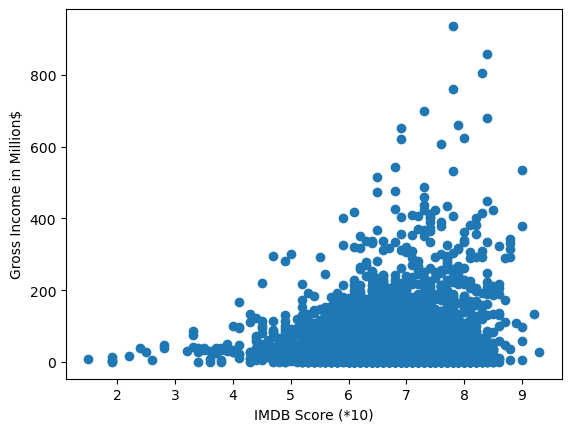

nan

In [12]:
x_values = merge_df["imdb_score"]
y_values = merge_df["Gross"]
plt.scatter(x_values, y_values)
#plt.ylim(0, 850000000)
#plt.xlim(0,100)
plt.ylabel("Gross Income in Million$")
plt.xlabel("IMDB Score (*10)")
plt.show()
imdb_reg = linregress(x_values, y_values)
imdb_line = imdb_reg.slope*x_values+imdb_reg.intercept
imdb_reg.slope
#plt.plot(x_values, imdb_line, "r")

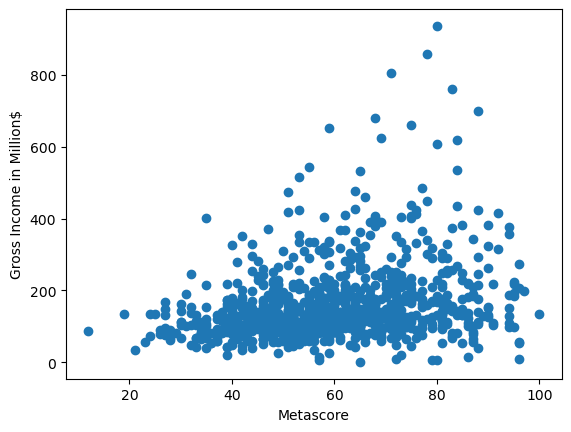

In [14]:
x_values = merge_df["Metascore"]
y_values = merge_df["Gross"]
plt.scatter(x_values, y_values)
#plt.ylim(0, 850000000)
#plt.xlim(0,100)
plt.ylabel("Gross Income in Million$")
plt.xlabel("Metascore")
plt.show()
meta_reg = linregress(x_values, y_values)
meta_line = meta_reg.slope*x_values+meta_reg.intercept

In [ ]:
x_values = merge_df["Rotten Tomatoes"]
y_values = merge_df["Gross"]
plt.scatter(x_values, y_values)
#plt.ylim(0, 850000000)
#plt.xlim(0,100)
plt.ylabel("Gross Income in Million$")
plt.xlabel("Rotten Tomatoes (%)")
plt.show()
rot_reg = linregress(x_values, y_values)
rot_line = rot_reg.slope*x_values+rot_reg.intercept

In [17]:
#Find per film average in revenue by director
directors = merge_df[["Director", "Gross"]]
director_average = directors.groupby(["Director"]).mean().sort_values(["Gross"], ascending = False)
director_average.head(50)

,Gross
Director,
Directors:Anthony Russo,456.134000
Josh Cooley,434.040000
Directors:Andrew Stanton,433.570000
Lee Unkrich,415.000000
Jon Watts,382.402500
Joss Whedon,369.266667
Chris Renaud,368.380000
J.J. Abrams,366.566667
Directors:Andrew Adamson,352.070000
